# Import Stuff

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from time import time

# Convert Train and Test to PD DATAFRAME

(3609, 563)
(1541, 562)


In [131]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.shape)
print(df_test.shape)

x_train=df_train.drop('activity',axis=1)
y_train=df_train['activity']

x_train,x_test, y_train, y_test=train_test_split(x_train,y_train,test_size=.2)


(3609, 563)
(1541, 562)


## Split train test data

In [121]:
x_train,x_test, y_train, y_test=train_test_split(x_train,y_train,test_size=.2)


In [122]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2887, 562)
(2887,)
(722, 562)
(722,)


# Train

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [10]:
clf=svm.SVC(C=100,kernel='rbf')
st=time()
clf.fit(x_train,y_train)
print("time: ",end="" )
print(str(time()-st)+" sec")
pred=clf.predict(x_test)
print("score: "+str(accuracy_score(y_test, pred)))

time: 1.858001708984375 sec
score: 0.9480968858131488


In [11]:
clf=MLPClassifier()
st=time()
clf.fit(x_train,y_train)
print("time: ",end="" )
print(str(time()-st)+" sec")
pred=clf.predict(x_test)
print("score: "+str(accuracy_score(y_test, pred)))

time: 0.5485303401947021 sec
score: 0.7750865051903114


In [12]:
from sklearn import naive_bayes
clf=naive_bayes.GaussianNB()
st=time()
clf.fit(x_train,y_train)
print("time: ",end="" )
print(str(time()-st)+" sec")
pred=clf.predict(x_test)
print("score: "+str(accuracy_score(y_test, pred)))

time: 0.04288506507873535 sec
score: 0.7993079584775087


In [10]:
clf=DecisionTreeClassifier()
st=time()
clf.fit(x_train,y_train)
print("time: ",end="" )
print(str(time()-st)+" sec")
pred=clf.predict(x_test)
print("score: "+str(accuracy_score(y_test, pred)))

time: 0.8469910621643066 sec
score: 0.9113573407202216


In [11]:
clf=RandomForestClassifier(criterion='entropy')
st=time()
clf.fit(x_train,y_train)
print("time: ",end="" )
print(str(time()-st)+" sec")
pred=clf.predict(x_test)
print("score: "+str(accuracy_score(y_test, pred)))

time: 0.27974891662597656 sec
score: 0.9542936288088643


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.shape)
print(df_test.shape)

x_train=df_train.drop('activity',axis=1)
y_train=df_train['activity']

x_train,x_test, y_train, y_test=train_test_split(x_train,y_train,test_size=.2)


(3609, 563)
(1541, 562)


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2887, 562)
(2887,)
(722, 562)
(722,)


In [4]:
y_train.replace({'LAYING':1,  'STANDING':2,  'SITTING':3,  'WALKING':4,  'WALKING_UPSTAIRS':5, 'WALKING_DOWNSTAIRS':6},inplace=True)
y_test.replace({'LAYING':1,  'STANDING':2,  'SITTING':3,  'WALKING':4,  'WALKING_UPSTAIRS':5, 'WALKING_DOWNSTAIRS':6},inplace=True)

In [54]:
# y_train=pd.DataFrame(y_train)
# y_test=pd.DataFrame(y_test)

In [5]:
x_train=x_train.astype("float")
y_train=y_train.astype("float")
x_test=x_test.astype("float")
y_test=y_test.astype("float")

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2887, 562)
(2887,)
(722, 562)
(722,)


In [72]:
y_train = tf.keras.utils.to_categorical(y=y_train.values)
y_test = tf.keras.utils.to_categorical(y=y_test.values)
print(y_train.shape)
print(y_test.shape)

(2887, 7)
(722, 7)


In [97]:
y_test=pd.DataFrame(y_test).iloc[:,1:]
y_train=pd.DataFrame(y_train).iloc[:,1:]


In [9]:
print(y_train.shape)
print(y_test.shape)

(2887,)
(722,)


In [13]:
model =tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1124 ,activation=tf.nn.relu, input_shape=(562,)))
model.add(tf.keras.layers.Dense(562 ,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(281 ,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(140 ,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(70 ,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(6 ,activation=tf.nn.softmax))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1124)              632812    
_________________________________________________________________
dense_10 (Dense)             (None, 562)               632250    
_________________________________________________________________
dense_11 (Dense)             (None, 140)               78820     
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 846       
Total params: 1,344,728
Trainable params: 1,344,728
Non-trainable params: 0
_________________________________________________________________


In [14]:
hisory = model.fit(x_train,y_train.values,epochs=50)

Epoch 1/50
2887/2887 [==============================] - 1s 215us/step - loss: nan - acc: 0.0014
Epoch 2/50
2887/2887 [==============================] - 0s 134us/step - loss: nan - acc: 0.0000e+00
Epoch 3/50
2887/2887 [==============================] - 0s 135us/step - loss: nan - acc: 0.0000e+000s - loss: nan - acc
Epoch 4/50
2887/2887 [==============================] - 0s 135us/step - loss: nan - acc: 0.0000e+00
Epoch 5/50
2887/2887 [==============================] - 0s 143us/step - loss: nan - acc: 0.0000e+00
Epoch 6/50
2887/2887 [==============================] - 0s 137us/step - loss: nan - acc: 0.0000e+00
Epoch 7/50
2887/2887 [==============================] - 0s 137us/step - loss: nan - acc: 0.0000e+00
Epoch 8/50
2887/2887 [==============================] - 0s 135us/step - loss: nan - acc: 0.0000e+00
Epoch 9/50
2887/2887 [==============================] - 0s 133us/step - loss: nan - acc: 0.0000e+00
Epoch 10/50
2887/2887 [==============================] - 0s 135us/step - loss: nan -

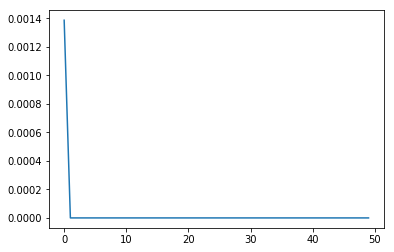

In [17]:
import matplotlib.pyplot as plt

plt.plot(hisory.history['acc'])

In [103]:
res = model.predict(x_test)
print(res)
# np.savetxt("foo.csv", res, delimiter=",")
# from google.colab import files
# files.download('foo.csv')

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [7.2919917e-38 9.9806648e-01 1.9335405e-03 4.4425980e-24 2.2438369e-24
  1.8697358e-35]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 ...
 [3.6495511e-11 1.9113086e-05 1.6365635e-05 2.9644221e-01 6.0622233e-01
  9.7300015e-02]
 [9.9555007e-04 2.4806405e-03 9.9652380e-01 1.2248438e-10 5.5419765e-08
  1.6585279e-19]
 [3.8010562e-20 7.0083965e-12 7.2803515e-13 9.8035723e-02 1.8400098e-01
  7.1796328e-01]]


In [185]:
res.shape

(722, 7)

In [186]:
count=0
for i in range(722):
    if(np.array_equal(res[i],y_test[i])):
        count+=1
print(count)
        

272
